<h1>The video Demo and the presentation can be found on the following GIT Link: https://github.com/prathyand/hackathon_tweetClassification/tree/main/submisssion </h1>

https://github.com/prathyand/hackathon_tweetClassification/

<h1>TEAM: OkayXD </h1>

Using Sklearn for model creation with seaborn for data visualization.

In [81]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# !pip install --upgrade --user scikit-learn

Importing the dataset and storing in a dataframe

In [83]:
df = pd.read_csv("data/train_dataset.csv",index_col=False)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3216 non-null   int64  
 1   Unnamed: 0.1              3216 non-null   int64  
 2   key                       3216 non-null   object 
 3   ID                        3216 non-null   float64
 4   create_date               3216 non-null   object 
 5   user                      3216 non-null   object 
 6   userID                    3216 non-null   float64
 7   RT_TF                     3216 non-null   bool   
 8   full_text                 3216 non-null   object 
 9   Sample.ID.x               3216 non-null   int64  
 10  Sample.ID.y               3216 non-null   int64  
 11  Still.Exists.x            3216 non-null   bool   
 12  Still.Exists.y            3216 non-null   bool   
 13  In.English.x              3216 non-null   bool   
 14  In.Engli

The memreduce function defined below is used to transform the integer defined in python into int8 and int16 so that the integer is compressed in python and the size of the dataframe is reduced. This results in lesser memory usage during the analysis of the data and lesser memory usage during the model training.

In [85]:
def memreduce(df):
    mem_before = df.memory_usage().sum() / 1024**2
    print("Memory Usage of DataFrame is "+ str(mem_before))
    for col in df.columns:
        coltype=df[col].dtype
        if coltype!=object:
            c_min=df[col].min()
            c_max=df[col].max()
            if(str(coltype)[:3]=='int'):
                if(c_min>=np.iinfo(np.int8).min and c_max<=np.iinfo(np.int8).max):
                    df[col]=df[col].astype(np.int8)
                elif(c_min>=np.iinfo(np.int16).min and c_max<=np.iinfo(np.int16).max):
                    df[col]=df[col].astype(np.int16)
                elif(c_min>=np.iinfo(np.int16).min and c_max<=np.iinfo(np.int16).max):
                    df[col]=df[col].astype(np.int16)
                    
            elif(str(coltype)[:5]=='float'):
                if(c_min>=np.finfo(np.float16).min and c_max<=np.finfo(np.float16).max):
                    df[col]=df[col].astype(np.float16)
                elif(c_min>=np.finfo(np.float32).min and c_max<=np.finfo(np.float32).max):
                    df[col]=df[col].astype(np.float32)
    mem_before = df.memory_usage().sum() / 1024**2
    print("Memory Usage of DataFrame after optimization is "+ str(mem_before))
    return df
                
                

In [86]:
df=memreduce(df)
gc.collect()

Memory Usage of DataFrame is 0.6656646728515625
Memory Usage of DataFrame after optimization is 0.3436279296875


385

The memreduce function reduced the memory from 0.66 to 0.34

In [87]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,2454,2454,JewNAS,1.232290e+18,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,366,...,1,0,0.0,0.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
1,870,870,JewAS,1.272910e+18,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,68,...,0,0,NaN,NaN,2,2,Jews2020May-Aug.rep1.rep1,0.0,0.0,1
2,763,763,JewAS,1.233040e+18,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,49,...,0,0,0.0,0.0,2,2,Jews2020Jan-Apr.rep1,NaN,NaN,1
3,3744,3744,KikesAS,1.202940e+18,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,45,...,1,1,0.0,0.0,0,0,kikes2019.rep1,NaN,NaN,1
4,1525,1525,JewNAS,1.168870e+18,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,186,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0
5,2363,2363,JewNAS,1.231520e+18,Sun Feb 23 05:09:05 -0500 2020,mksharma4269,4.355702e+09,True,Those who’ve read or watched on media the hist...,246,...,0,0,1.0,1.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
6,1737,1737,JewNAS,1.110570e+18,Tue Mar 26 11:42:27 -0400 2019,DrKlep,2.481168e+07,True,"In 2017, the Charlottesville rally of white su...",459,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0
7,1436,1436,JewNAS,1.105120e+18,Mon Mar 11 11:02:53 -0400 2019,Noetic_Karma,5.166556e+07,False,Warning : Pakistan's state media have started ...,64,...,1,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0
8,1322,1322,JewNAS,1.146550e+18,Wed Jul 03 18:34:35 -0400 2019,sagetwitting,3.257236e+09,True,Damn. What a statement.\n\n“Jews Against ICE: ...,408,...,0,0,1.0,0.0,13,13,Jews2019.rep1,NaN,NaN,0
9,1577,1577,JewNAS,1.115660e+18,Tue Apr 09 12:39:16 -0400 2019,Charlot38927993,2.793329e+09,True,“She (Congresswoman Omar) keeps on assaulting ...,250,...,0,0,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0


Created a function to find the missing values in the dataset. This function returns the list of attributes with missing values.

In [88]:
def misval(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val = mis_val.rename(
        columns = {0 : 'Missing Values', 1 : 'per'})
        mis_val['Data Type'] = df.dtypes
        mis_val = mis_val[
            mis_val.iloc[:,1] != 0].sort_values('per', ascending=False).round(1)
        mis_val['per']=mis_val['per']
        mis_val['per']=mis_val['per'].astype(np.float16)
        
        return mis_val

sum_missing=misval(df)
sum_missing

,Missing Values,per,Data Type
Is.About.The.Holocaust.x,2264,70.37500,float16
Is.About.The.Holocaust.y,2264,70.37500,float16
Is.About.the.Holocaust.x,952,29.59375,float16
Is.About.the.Holocaust.y,952,29.59375,float16


Describing the Features in te dataset

In [89]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,ID,userID,Sample.ID.x,Sample.ID.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
count,3216.000000,3216.000000,3.216000e+03,3.216000e+03,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,2264.000000,2264.000000,3216.000000,3216.000000,952.000000,952.000000,3216.000000
mean,1999.877799,1999.877799,1.215329e+18,4.117404e+17,242.249378,242.249378,2.768035,2.707090,0.281405,0.204913,0.105591,0.072876,11.282649,11.077114,0.107117,0.093506,0.231032
std,1168.858979,1168.858979,6.075277e+16,5.062683e+17,144.527845,144.527845,0.637587,0.742841,0.449755,0.403701,0.307373,0.260010,3.527015,3.973351,0.309570,0.291260,0.421559
min,0.000000,0.000000,1.079900e+18,1.994321e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,982.500000,982.500000,1.167218e+18,2.608568e+08,118.000000,118.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,0.000000,0.000000,0.000000
50%,1990.000000,1990.000000,1.225400e+18,2.742042e+09,237.000000,237.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
75%,3023.500000,3023.500000,1.266367e+18,9.545080e+17,366.250000,366.250000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
max,4018.000000,4018.000000,1.300530e+18,1.294950e+18,500.000000,500.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000,1.000000


Describing All features in the Train Dataset

In [90]:
df.describe(include="all")

,Unnamed: 0,Unnamed: 0.1,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
count,3216.000000,3216.000000,3216,3.216000e+03,3216,3216,3.216000e+03,3216,3216,3216.000000,...,3216.000000,3216.000000,2264.000000,2264.000000,3216.000000,3216.000000,3216,952.000000,952.000000,3216.000000
unique,NaN,NaN,8,NaN,3211,2931,NaN,2,2938,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN
top,NaN,NaN,JewNAS,NaN,Mon Jul 27 20:43:01 -0400 2020,theforeverman,NaN,True,Richard Spencer is a fucking Nazi.\nDon't beli...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Jews2020Jan-Apr.rep1,NaN,NaN,NaN
freq,NaN,NaN,1763,NaN,4,32,NaN,1690,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,355,NaN,NaN,NaN
mean,1999.877799,1999.877799,NaN,1.215329e+18,NaN,NaN,4.117404e+17,NaN,NaN,242.249378,...,0.281405,0.204913,0.105591,0.072876,11.282649,11.077114,NaN,0.107117,0.093506,0.231032
std,1168.858979,1168.858979,NaN,6.075277e+16,NaN,NaN,5.062683e+17,NaN,NaN,144.527845,...,0.449755,0.403701,0.307373,0.260010,3.527015,3.973351,NaN,0.309570,0.291260,0.421559
min,0.000000,0.000000,NaN,1.079900e+18,NaN,NaN,1.994321e+06,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,982.500000,982.500000,NaN,1.167218e+18,NaN,NaN,2.608568e+08,NaN,NaN,118.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,NaN,0.000000,0.000000,0.000000
50%,1990.000000,1990.000000,NaN,1.225400e+18,NaN,NaN,2.742042e+09,NaN,NaN,237.000000,...,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,NaN,0.000000,0.000000,0.000000
75%,3023.500000,3023.500000,NaN,1.266367e+18,NaN,NaN,9.545080e+17,NaN,NaN,366.250000,...,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,NaN,0.000000,0.000000,0.000000


In [91]:
sum_missing = (df.isna().sum())

In [92]:
print('Features missing values',sum_missing[sum_missing > 0].count())

Features missing values 4


In [93]:
sum_missing = pd.DataFrame(sum_missing)
sum_missing.columns = ['count']
sum_missing.index.names = ['Name']
sum_missing['Name'] = sum_missing.index


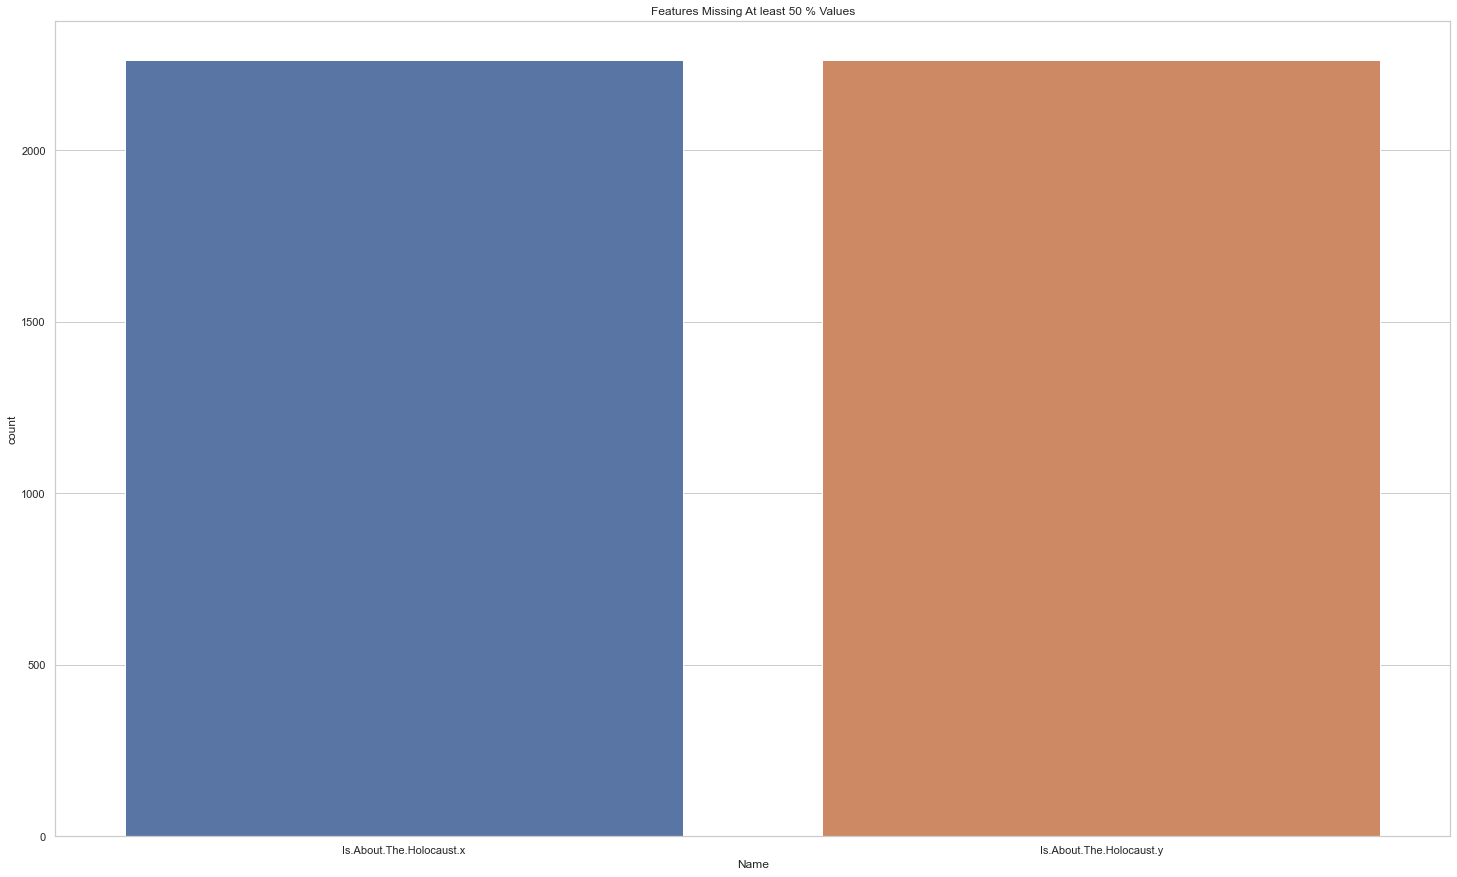

In [94]:
sns.set(style="whitegrid", color_codes=True,rc={'figure.figsize':(25,15)})
sns.barplot(x = 'Name', y = 'count', data=sum_missing[sum_missing['count']>len(df)/2]).set(title='Features Missing At least 50 % Values')
# plt.xticks(rotation = 90)
plt.show()

Checking if the target variable is balanced

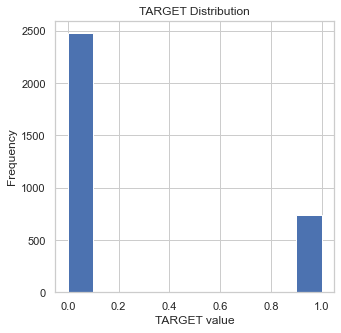

In [95]:
plt.figure(figsize=(5,5))
df['Target'].plot.hist(label=True);
plt.title('TARGET Distribution')
plt.xlabel('TARGET value')
plt.ylabel('Frequency');
plt.show()

<h3>Analysis on Numerical Features: IHRA section </h3>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


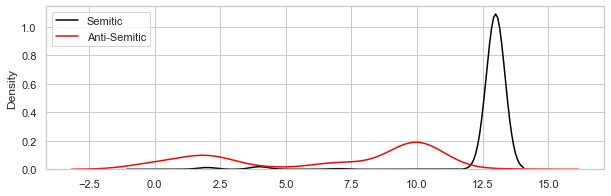

In [96]:
plt.figure(figsize=(10,3))
sns.distplot(df[df['Target']==0]['IHRA.Section.x'].values,hist=False,label="Semitic", color='black')
sns.distplot(df[df['Target']==1]['IHRA.Section.x'].values,hist=False,label="Anti-Semitic", color='red')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


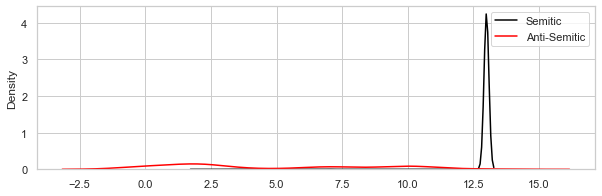

In [97]:
plt.figure(figsize=(10,3))
sns.distplot(df[df['Target']==0]['IHRA.Section.y'].values,hist=False,label="Semitic", color='black')
sns.distplot(df[df['Target']==1]['IHRA.Section.y'].values,hist=False,label="Anti-Semitic", color='red')
plt.legend()
plt.show()

<h3>Analysis on Numerical Features: Sentiment Rating section </h3>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


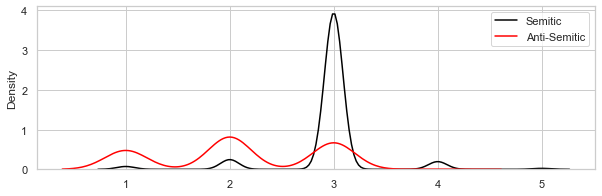

In [98]:
plt.figure(figsize=(10,3))
sns.distplot(df[df['Target']==0]['Sentiment.Rating.x'].values,hist=False,label="Semitic", color='black')
sns.distplot(df[df['Target']==1]['Sentiment.Rating.x'].values,hist=False,label="Anti-Semitic", color='red')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


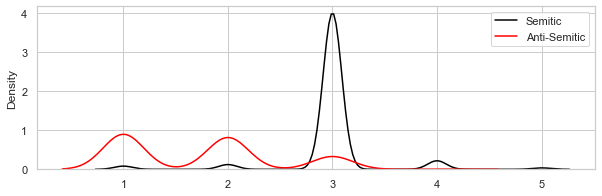

In [99]:
plt.figure(figsize=(10,3))
sns.distplot(df[df['Target']==0]['Sentiment.Rating.y'].values,hist=False,label="Semitic", color='black')
sns.distplot(df[df['Target']==1]['Sentiment.Rating.y'].values,hist=False,label="Anti-Semitic", color='red')
plt.legend()
plt.show()

<h3>Distribution of Sample_name</h3>

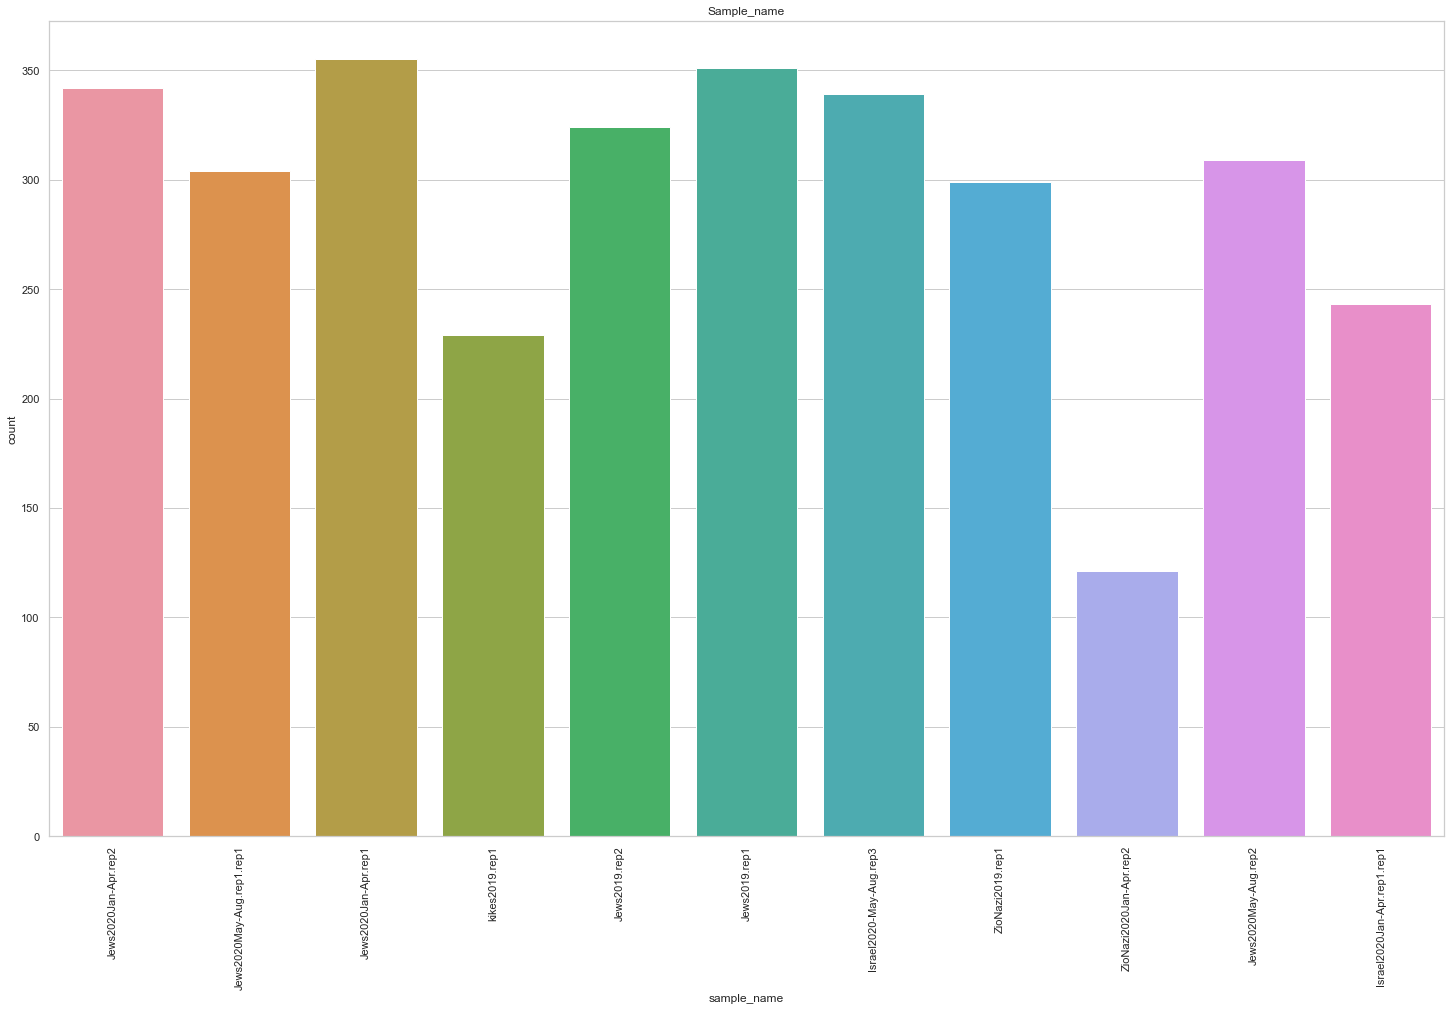

In [100]:
sns.countplot(x='sample_name', data=df)
plt.title('Sample_name')
plt.xticks(rotation=90)
plt.show()

## Correlation

Created a correlation map of the dataset with the target variable.

In [101]:
corr_mat = df.corr(method='pearson')
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()

cm=pd.DataFrame(sorted_mat)
cm=cm.loc[((cm[0]>-0.9) | (cm[0]<0.9)),:]
# df[df.index.str.contains('foo')]
cm.reset_index(inplace=True)

In [102]:
cm[cm['level_0'].str.contains('Target') | cm['level_1'].str.contains('Target') ]

,level_0,level_1,0
0,Target,IHRA.Section.y,-0.872644
1,Target,IHRA.Section.x,-0.729260
2,Target,Sentiment.Rating.y,-0.723462
3,Target,Sentiment.Rating.x,-0.571269
4,Target,RT_TF,-0.281357
7,Target,Calling.Out.x,-0.198643
10,Target,Is.About.the.Holocaust.x,-0.161212
11,Target,ID,-0.157218
12,Target,Calling.Out.y,-0.148500
16,Target,Still.Exists.x,-0.124562


In [103]:
df.corr()['Target']

Unnamed: 0                  0.163121
Unnamed: 0.1                0.163121
ID                         -0.157218
userID                      0.088735
RT_TF                      -0.281357
Sample.ID.x                -0.055638
Sample.ID.y                -0.055638
Still.Exists.x             -0.124562
Still.Exists.y             -0.115336
In.English.x                     NaN
In.English.y                     NaN
Sarcasm.x                  -0.032951
Sarcasm.y                  -0.017971
Disagree.With.x            -0.047500
Disagree.With.y            -0.016569
Sentiment.Rating.x         -0.571269
Sentiment.Rating.y         -0.723462
Calling.Out.x              -0.198643
Calling.Out.y              -0.148500
Is.About.the.Holocaust.x   -0.161212
Is.About.the.Holocaust.y   -0.122588
IHRA.Section.x             -0.729260
IHRA.Section.y             -0.872644
Is.About.The.Holocaust.x   -0.077513
Is.About.The.Holocaust.y   -0.022162
Target                      1.000000
Name: Target, dtype: float64

<AxesSubplot:>

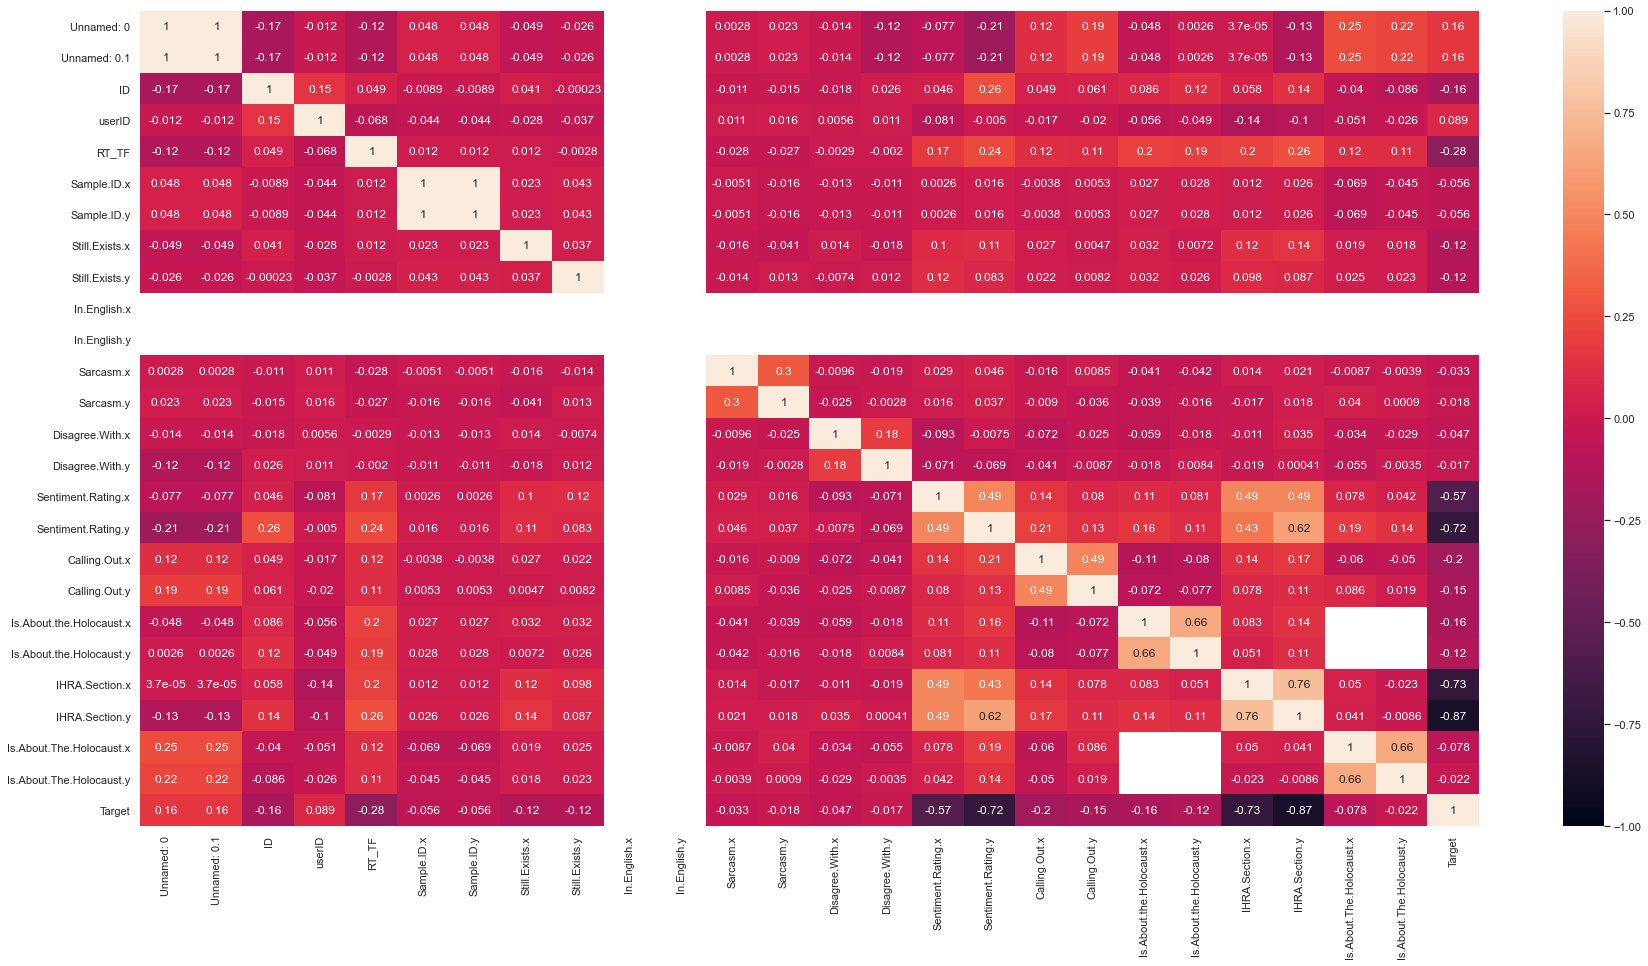

In [104]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True)

# Pipeline

Creating a dataframe selector along with an imputer so that the pipleline can be created.

In [105]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class Imputewithother(BaseEstimator, TransformerMixin):
    def __init__(self):
        super()
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X=pd.DataFrame(X,columns=['a','b','c','d'])
        h1,h2,h3,h4='a','b','c','d'
        X[h1].fillna(X[h3],inplace=True)
        X[h2].fillna(X[h4],inplace=True)
        X.drop(columns=['c','d'],inplace=True)
        return X.values

Creating a test train split from the input data.

In [106]:
y=df['Target']
X=df.drop(['Target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [107]:
num_cols =list(X_train._get_numeric_data().columns)
catcols=list(set(X_train.columns) - set(num_cols))
print(num_cols,"\n")
print(catcols)

['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'userID', 'RT_TF', 'Sample.ID.x', 'Sample.ID.y', 'Still.Exists.x', 'Still.Exists.y', 'In.English.x', 'In.English.y', 'Sarcasm.x', 'Sarcasm.y', 'Disagree.With.x', 'Disagree.With.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y', 'Calling.Out.x', 'Calling.Out.y', 'Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y', 'IHRA.Section.x', 'IHRA.Section.y', 'Is.About.The.Holocaust.x', 'Is.About.The.Holocaust.y'] 

['full_text', 'user', 'create_date', 'key', 'sample_name', 'Additional.Comments.y', 'User.x', 'User.y', 'Additional.Comments.x']


In [108]:
[(i,v) for i,v in enumerate(list(X_train.columns))]

[(0, 'Unnamed: 0'),
 (1, 'Unnamed: 0.1'),
 (2, 'key'),
 (3, 'ID'),
 (4, 'create_date'),
 (5, 'user'),
 (6, 'userID'),
 (7, 'RT_TF'),
 (8, 'full_text'),
 (9, 'Sample.ID.x'),
 (10, 'Sample.ID.y'),
 (11, 'Still.Exists.x'),
 (12, 'Still.Exists.y'),
 (13, 'In.English.x'),
 (14, 'In.English.y'),
 (15, 'Sarcasm.x'),
 (16, 'Sarcasm.y'),
 (17, 'Additional.Comments.x'),
 (18, 'Additional.Comments.y'),
 (19, 'User.x'),
 (20, 'User.y'),
 (21, 'Disagree.With.x'),
 (22, 'Disagree.With.y'),
 (23, 'Sentiment.Rating.x'),
 (24, 'Sentiment.Rating.y'),
 (25, 'Calling.Out.x'),
 (26, 'Calling.Out.y'),
 (27, 'Is.About.the.Holocaust.x'),
 (28, 'Is.About.the.Holocaust.y'),
 (29, 'IHRA.Section.x'),
 (30, 'IHRA.Section.y'),
 (31, 'sample_name'),
 (32, 'Is.About.The.Holocaust.x'),
 (33, 'Is.About.The.Holocaust.y')]

In [109]:
pipedefault =['RT_TF','Still.Exists.x','Still.Exists.y','Sarcasm.x','Sarcasm.y','Disagree.With.x','Disagree.With.y',
              'Sentiment.Rating.x','Sentiment.Rating.y','Calling.Out.x','Calling.Out.y']

pipefilter1 = ['Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y','Is.About.The.Holocaust.x', 'Is.About.The.Holocaust.y']
pipefilter2 = ['IHRA.Section.x','IHRA.Section.y','sample_name']

pipe0 = Pipeline([
        ('selector', DataFrameSelector(pipedefault)),
    ])

pipe1 = Pipeline([
        ('selector', DataFrameSelector(pipefilter1)),
        ('Imputewithother', Imputewithother()),
        ('imputer', SimpleImputer(strategy='median')),
    ])

pipe2 = Pipeline([
        ('selector', DataFrameSelector(pipefilter2)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("pipe0", pipe0),
        ("pipe1", pipe1),
        ("pipe2", pipe2),
    ])

In [110]:
gc.collect()

15

Creating an experiment log to create store the model test and train metrics during model training.

In [111]:
try:
    expLog
    del expLog
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Test  AUC",
                                   "Train F1",
                                   "Test F1",
                                   "best_score"
                                  ])

In [112]:
def addresultotable(model,name):
    exp_name = name
    expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                   [accuracy_score(y_train, model.predict(X_train)), 
                    accuracy_score(y_test, model.predict(X_test)),
                    roc_auc_score(y_train, model.predict(X_train)),
                    roc_auc_score(y_test, model.predict(X_test)),
                    f1_score(y_train, model.predict(X_train), average='weighted'),
                    f1_score(y_test, model.predict(X_test), average='weighted'),
                   model.best_score_],
        4)) 
    
def plotConf(model):
    plt.clf()
    plt.figure(figsize=(30, 15))
    plot_confusion_matrix(model, X_train, y_train)
    plt.title('Confusion Matrix ')
    plt.show()

def plotROC(model):
    plt.figure(figsize=(30, 15))
    RocCurveDisplay.from_predictions(y_test, model.predict(X_test))
    plt.show()

def trainmodel(regressor,datapipeline,paramgrid,scoring):
    pipe = Pipeline([
        ("preparation", datapipeline),
        ("reg", regressor)
    ])
    model=RandomizedSearchCV(pipe,param_distributions=paramgrid,n_iter=10,scoring=scoring,n_jobs=-1,cv=5,verbose=2)
    model.fit(X_train,y_train)
    return model

In [113]:
MODELS={}

# XGBoost

Creating the XGBoost model using the Sklearn package. The XGBoost Model is initilaized using the init parameters that are described below.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 a

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warning

<Figure size 2160x1080 with 0 Axes>

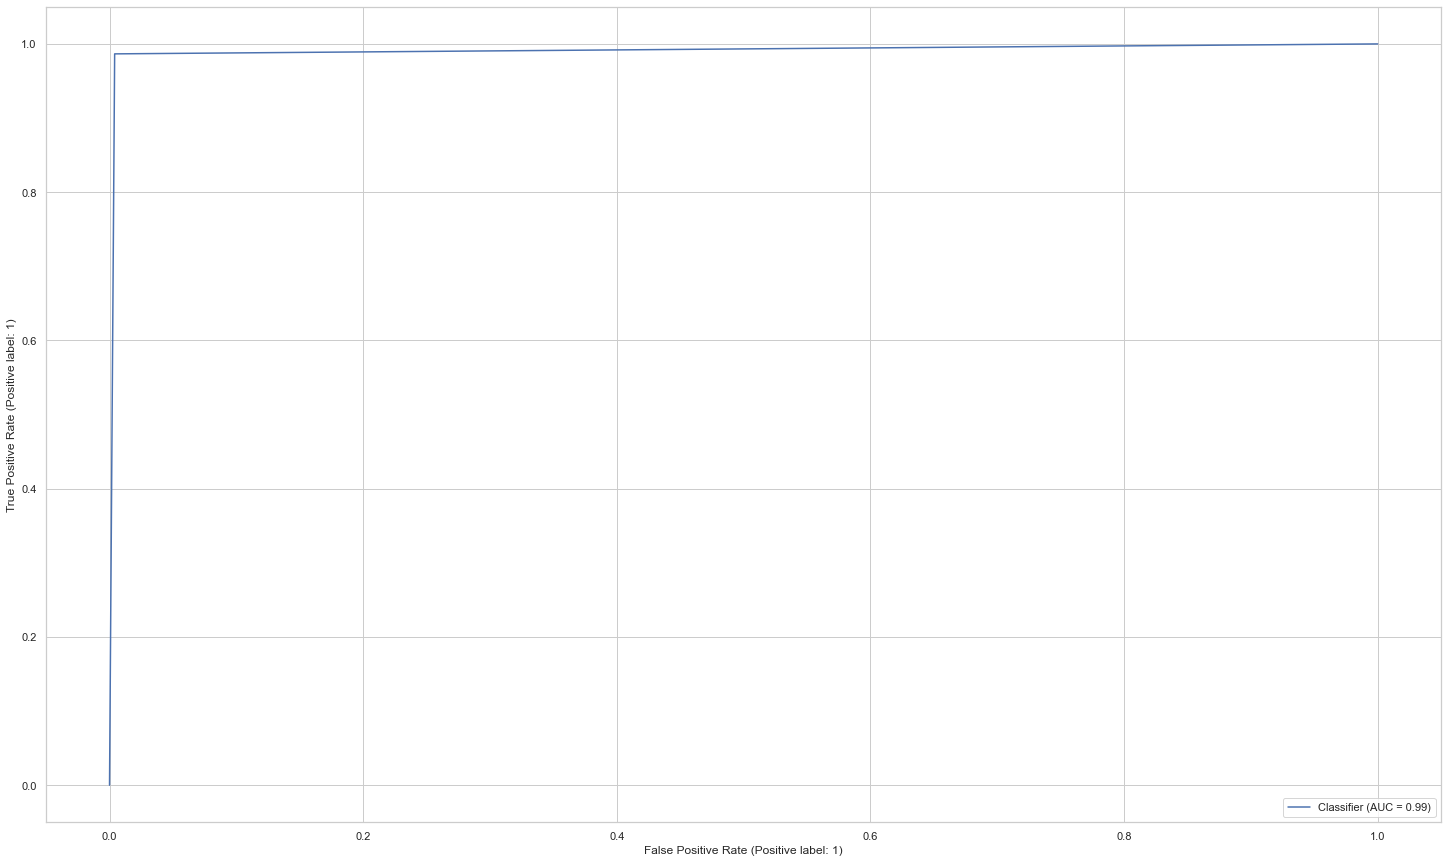

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

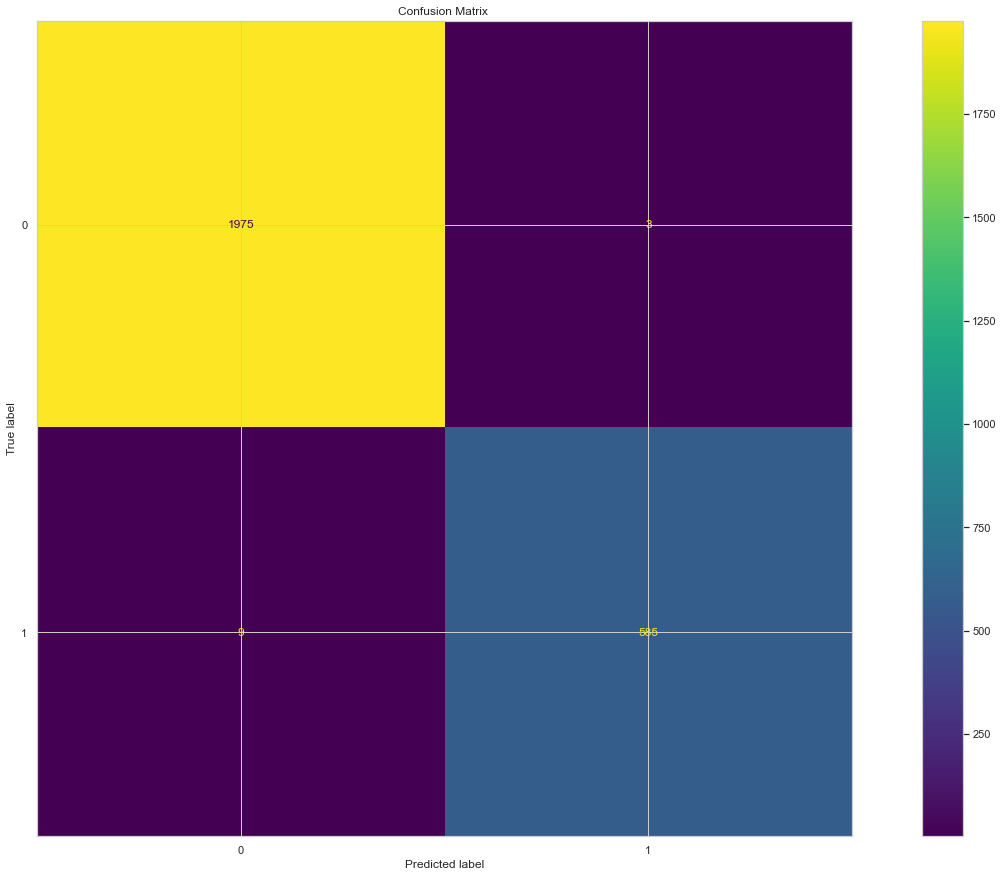

In [114]:
parameters = {
    "reg__loss":["deviance"],
    "reg__learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "reg__min_samples_split": np.linspace(0.1, 0.5, 12),
    "reg__min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "reg__max_depth":[3,5,8],
    "reg__max_features":["log2","sqrt"],
    "reg__criterion": ["friedman_mse",  "mae"],
    "reg__subsample":[0.5,1.0],
    "reg__n_estimators":[10,50,100]
    }

model=trainmodel(GradientBoostingClassifier(),data_prep_pipeline,parameters,'accuracy')
addresultotable(model,"XGB")

plotROC(model)
plotConf(model)

In [115]:
model_XGB=model
MODELS['xgb']=model_XGB

In [116]:
model.best_params_

{'reg__subsample': 1.0,
 'reg__n_estimators': 50,
 'reg__min_samples_split': 0.2090909090909091,
 'reg__min_samples_leaf': 0.2090909090909091,
 'reg__max_features': 'log2',
 'reg__max_depth': 3,
 'reg__loss': 'deviance',
 'reg__learning_rate': 0.15,
 'reg__criterion': 'mae'}

# SVD/LOG 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 2160x1080 with 0 Axes>

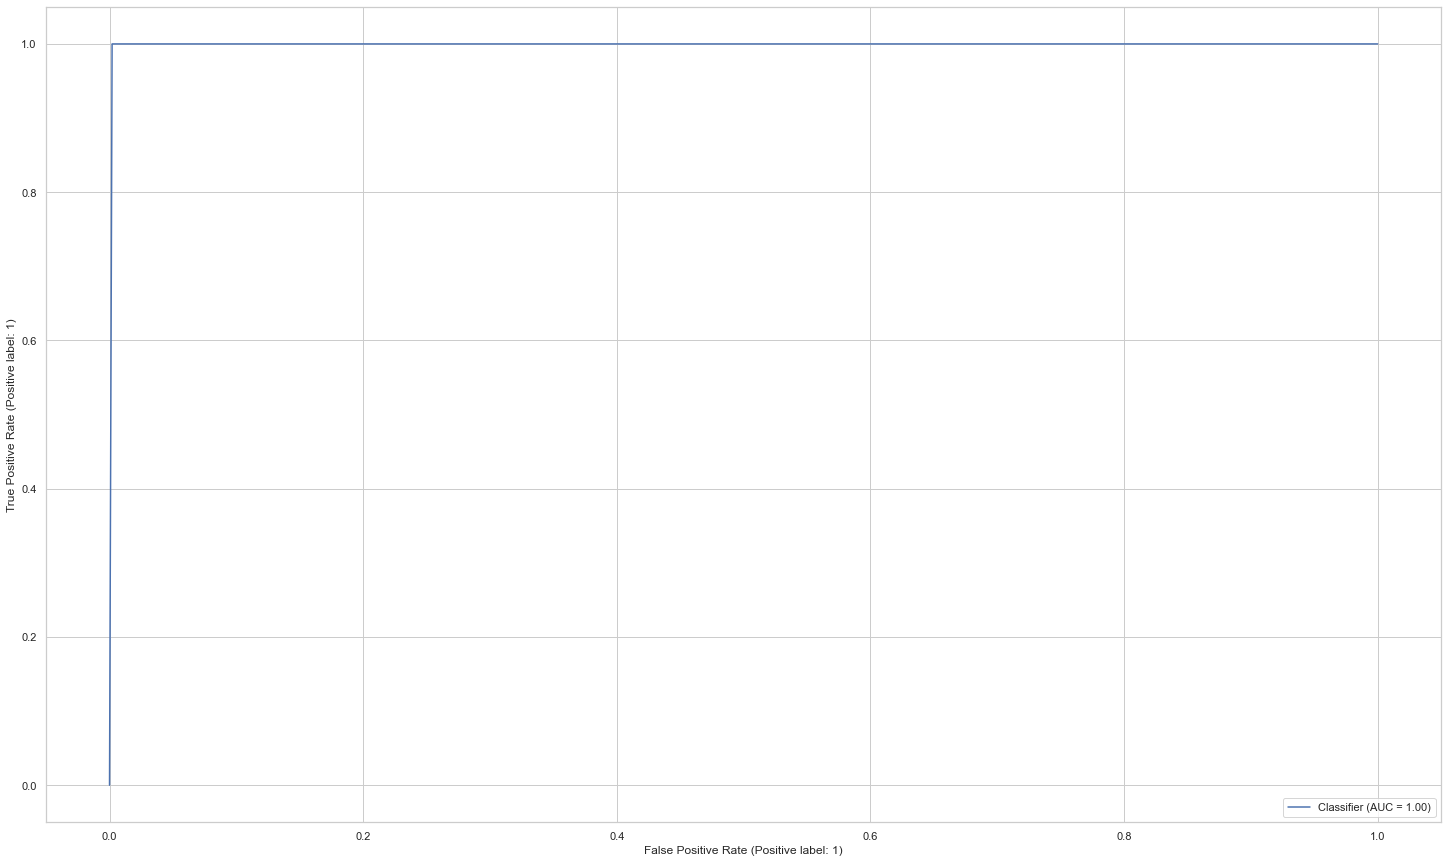

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

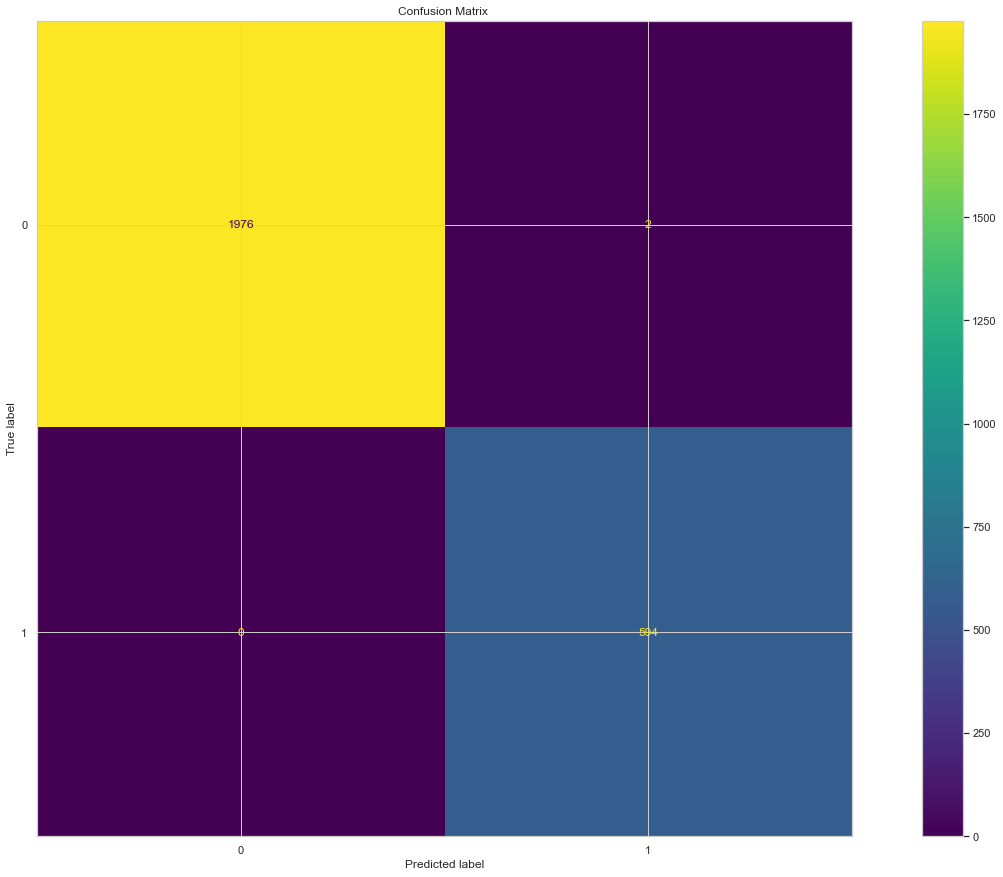

In [117]:
param_grid = {
    'reg__loss': ['hinge','log'],
    'reg__penalty':['l2', 'l1', 'elasticnet'],
    'reg__alpha': [0.0001, 0.001,0.01, 0.1]
}

model=trainmodel(SGDClassifier(),data_prep_pipeline,param_grid,'accuracy')
# if(model.best_params_['reg__loss']=='hinge'):
#     from sklearn.calibration import CalibratedClassifierCV
#     cal=CalibratedClassifierCV(model, cv='prefit')
#     model=trainmodel(cal,data_prep_pipeline,param_grid,'accuracy')
addresultotable(model,"SVD_LOG")
plotROC(model)
plotConf(model)
model_SVD_LOG=model
MODELS['SVD_LOG']=model_SVD_LOG

In [118]:
model.best_params_

{'reg__penalty': 'l2', 'reg__loss': 'hinge', 'reg__alpha': 0.01}

In [119]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988


# RandomForest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 2160x1080 with 0 Axes>

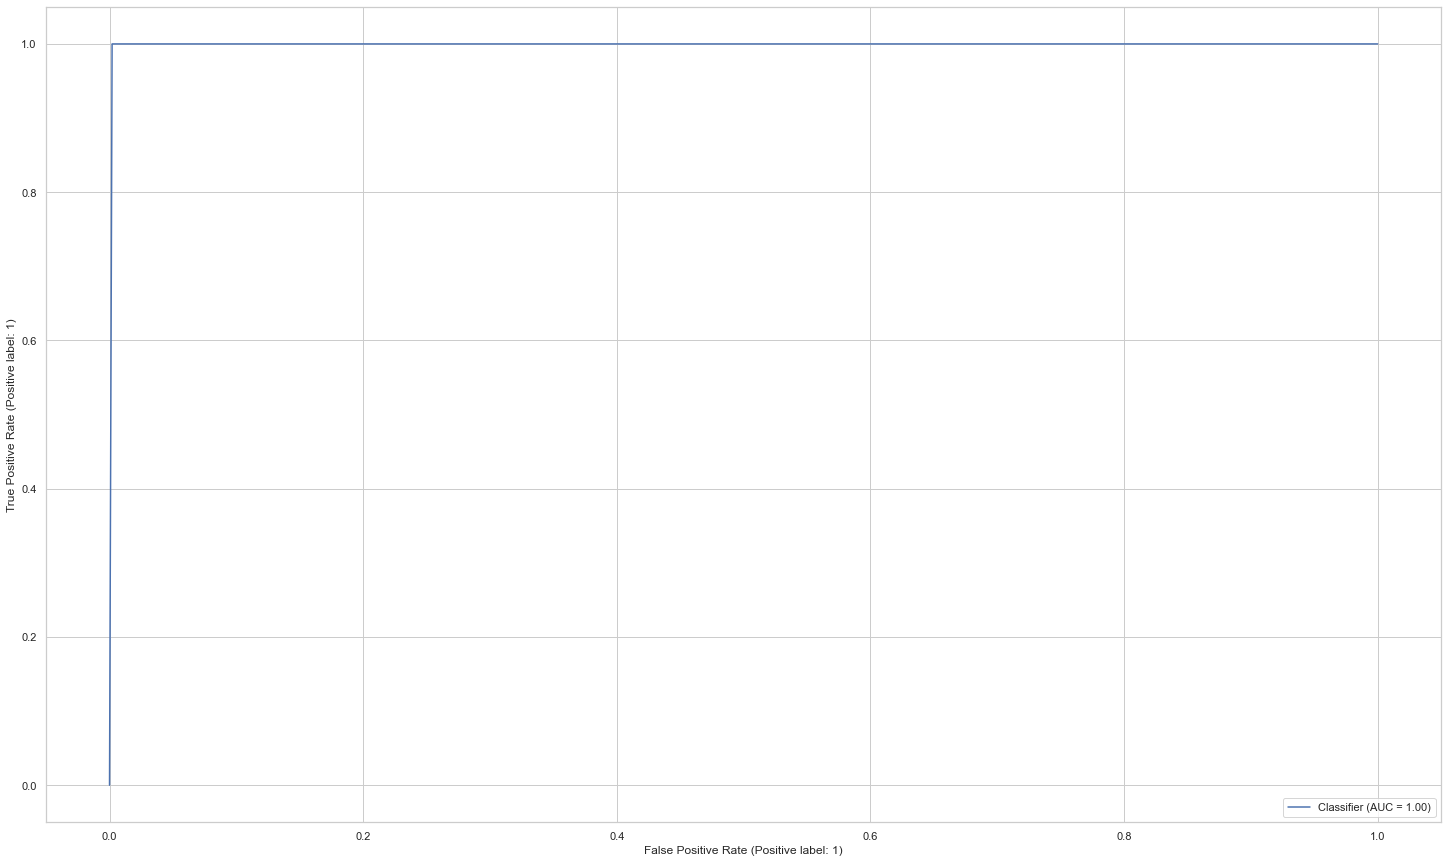

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

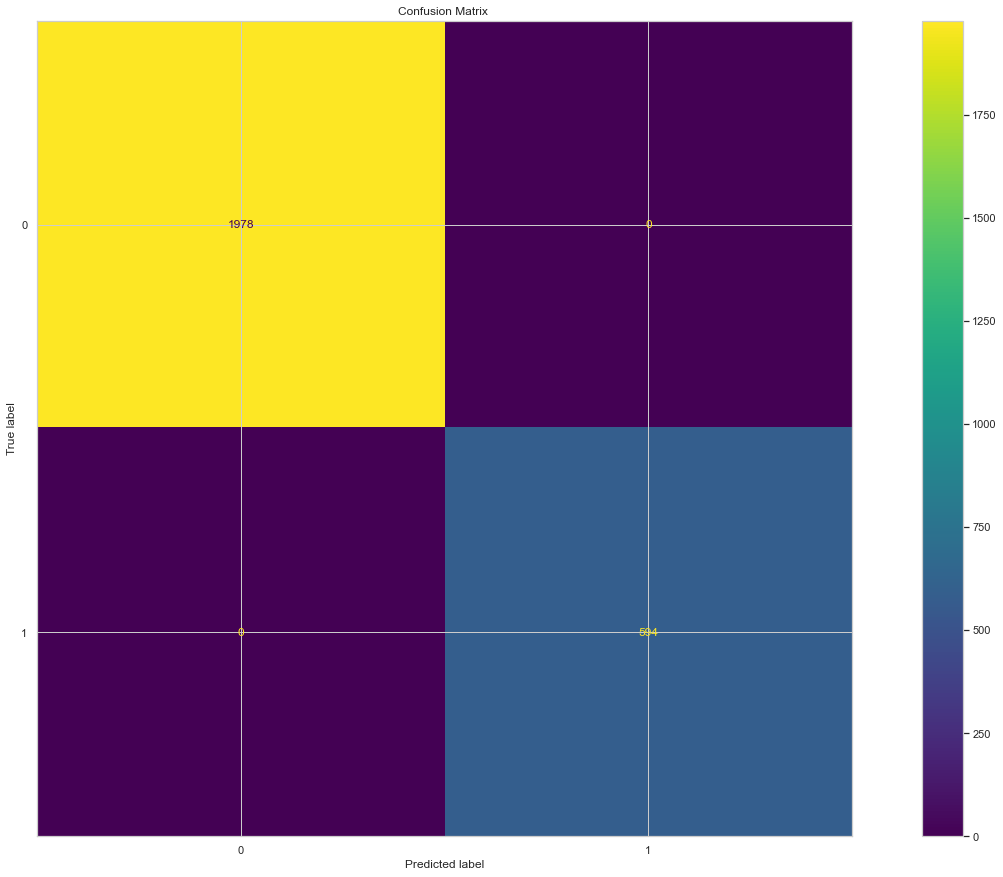

In [120]:
param_grid = {
    'reg__bootstrap': [True],
    'reg__max_depth': [10, 20,50,100],
    'reg__max_features': [2, 5,10,50],
    'reg__n_estimators': [100, 200,500]
}
model=trainmodel(RandomForestClassifier(),data_prep_pipeline,param_grid,'accuracy')
addresultotable(model,"RF")
model_RF=model
MODELS['RF']=model_RF
plotROC(model)
plotConf(model)

In [121]:
model.best_params_

{'reg__n_estimators': 200,
 'reg__max_features': 5,
 'reg__max_depth': 50,
 'reg__bootstrap': True}

In [122]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988
2,RF,1.0000,0.9984,1.0000,0.9990,1.0000,0.9984,0.9992


# KNN

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 2160x1080 with 0 Axes>

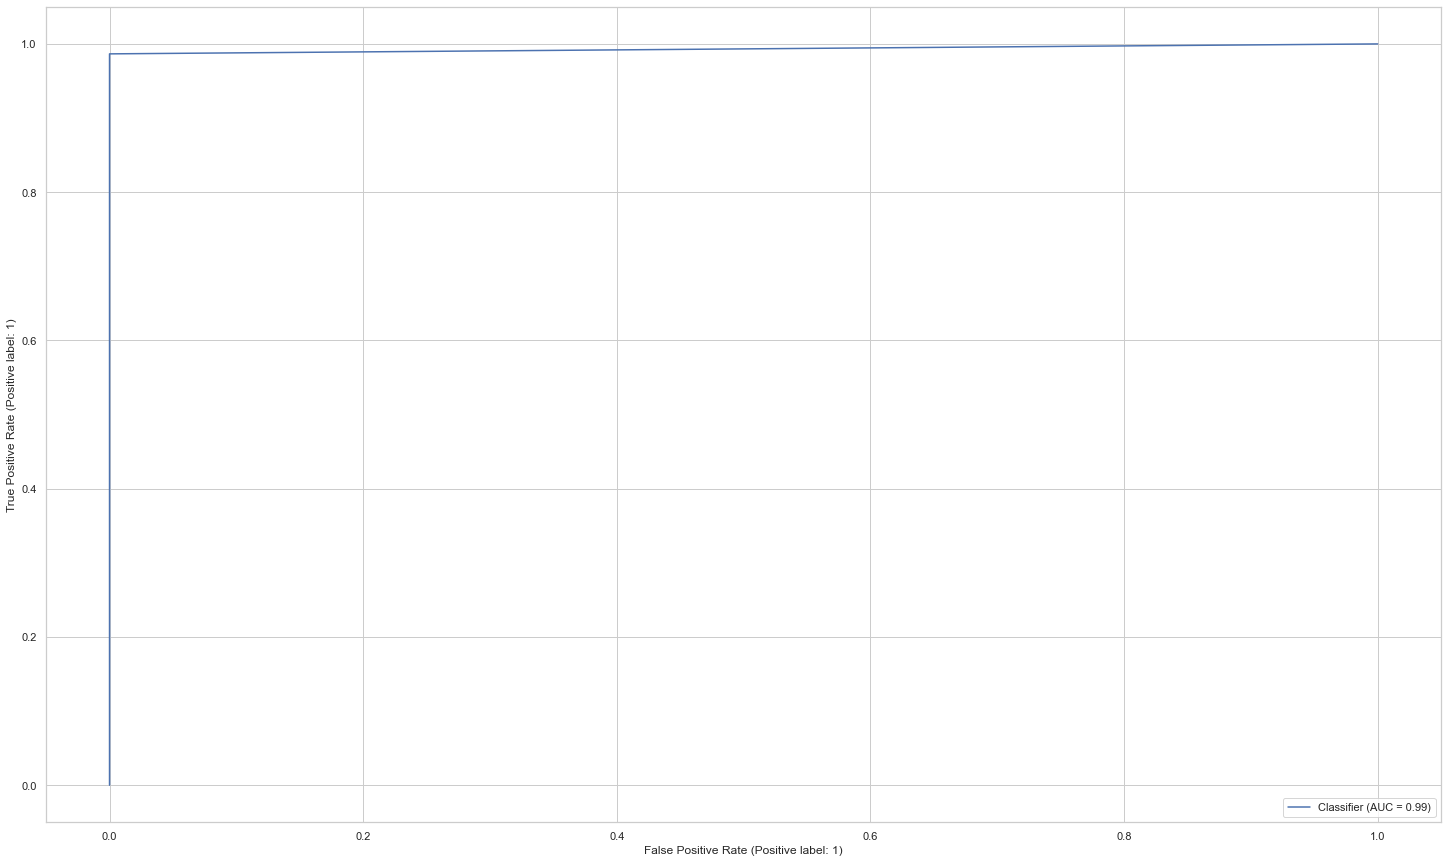

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

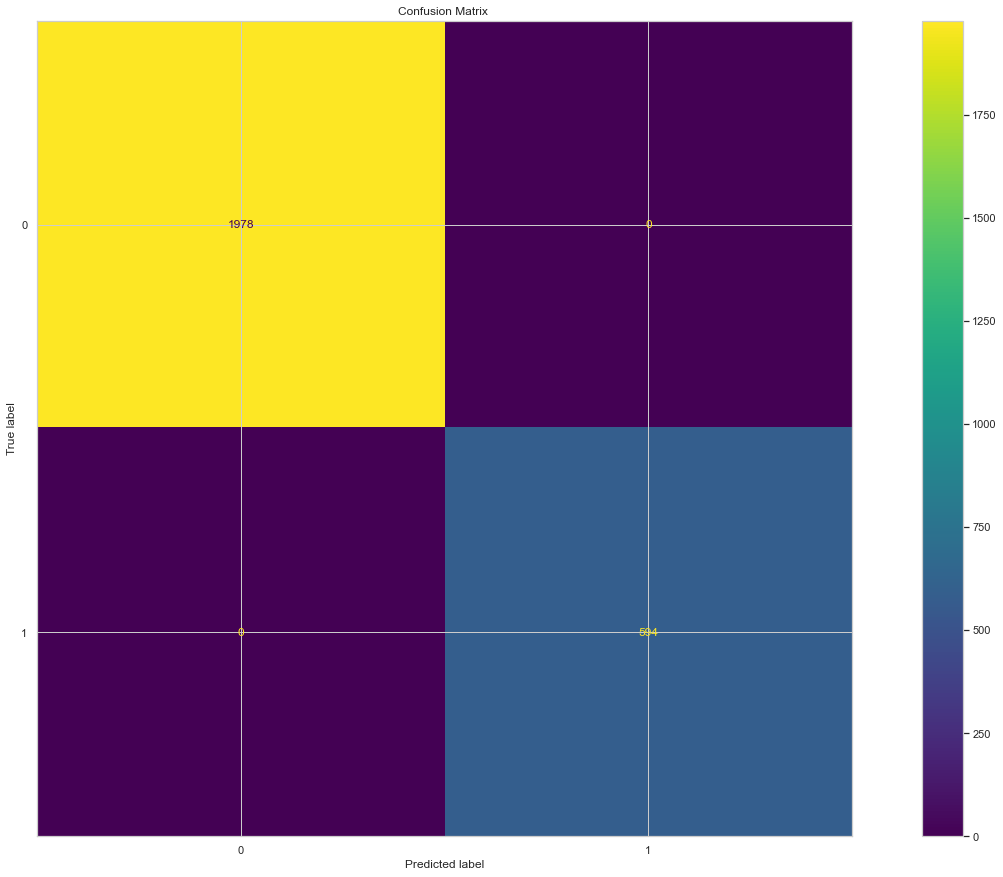

In [123]:
param_grid = {
    'reg__n_neighbors': [2,5,10],
    'reg__weights':['uniform', 'distance'],
    'reg__p': [1,2]
}
model=trainmodel(KNeighborsClassifier(),data_prep_pipeline,param_grid,'accuracy')
addresultotable(model,"KNN")
model_Knn=model
MODELS['Knn']=model_Knn
plotROC(model)
plotConf(model)

In [124]:
model.best_params_

{'reg__weights': 'distance', 'reg__p': 1, 'reg__n_neighbors': 2}

In [125]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988
2,RF,1.0000,0.9984,1.0000,0.9990,1.0000,0.9984,0.9992
3,KNN,1.0000,0.9969,1.0000,0.9933,1.0000,0.9969,0.9984


# Best model predictions/

In [126]:
model_SVD_LOG = MODELS['SVD_LOG']

In [127]:
testdata = pd.read_csv("data/test_dataset.csv",index_col=False)


In [128]:
ytest=model_SVD_LOG.predict(testdata)

In [129]:
submission = pd.DataFrame({

        "ID": testdata["ID"],

        "Target": ytest

    })

In [130]:
submission.head(5)

,ID,Target
0,1.228840e+18,0
1,1.284940e+18,0
2,1.240280e+18,0
3,1.243150e+18,0
4,1.296620e+18,0


In [131]:
submission.to_csv('submission_SVDLOG.csv', index=False)

In [132]:
model = MODELS['RF']
ytest=model.predict(testdata)
submission = pd.DataFrame({

        "ID": testdata["ID"],

        "Target": ytest

    })
submission.to_csv('submission_RF.csv', index=False)

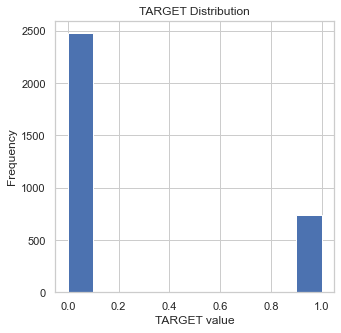

In [133]:
plt.figure(figsize=(5,5))
df['Target'].plot.hist(label=True);
plt.title('TARGET Distribution')
plt.xlabel('TARGET value')
plt.ylabel('Frequency');
plt.show()

In [134]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

from sklearn.utils import resample

zerodata = train_data[train_data.Target==0]
onedata = train_data[train_data.Target==1]

default_sampled_data = resample(zerodata,
                          replace=True,
                          n_samples=int(len(onedata)*1.5), 
                          random_state=123) 

train_data = pd.concat([onedata, default_sampled_data])

train_data.Target.value_counts()

0    891
1    594
Name: Target, dtype: int64

In [135]:
y=train_data['Target']
X=train_data.drop(['Target'],axis=1)
print(X.shape,train_data.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(1485, 34) (1485, 35)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 a

<Figure size 2160x1080 with 0 Axes>

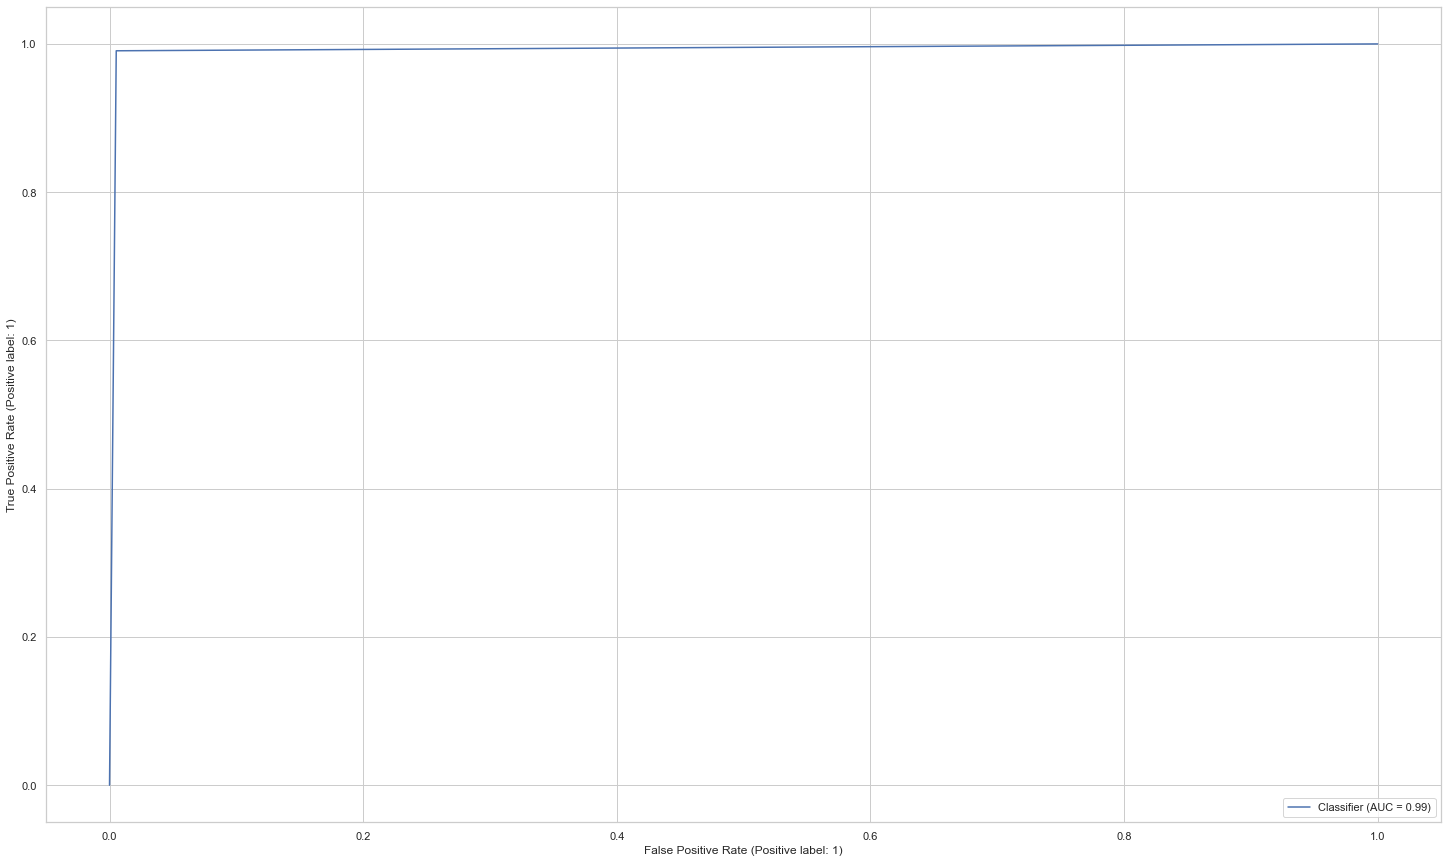

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

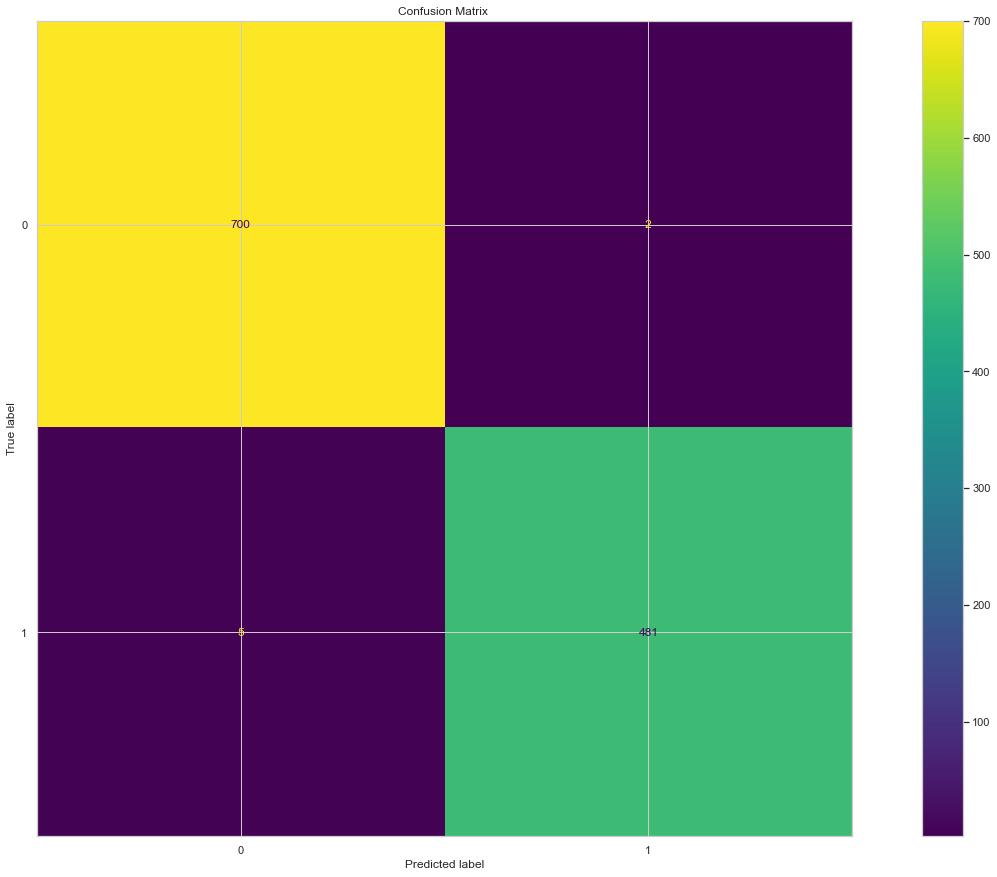

{'reg__subsample': 1.0,
 'reg__n_estimators': 50,
 'reg__min_samples_split': 0.3545454545454546,
 'reg__min_samples_leaf': 0.1,
 'reg__max_features': 'log2',
 'reg__max_depth': 8,
 'reg__loss': 'deviance',
 'reg__learning_rate': 0.1,
 'reg__criterion': 'mae'}

In [136]:
parameters = {
    "reg__loss":["deviance"],
    "reg__learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "reg__min_samples_split": np.linspace(0.1, 0.5, 12),
    "reg__min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "reg__max_depth":[3,5,8],
    "reg__max_features":["log2","sqrt"],
    "reg__criterion": ["friedman_mse",  "mae"],
    "reg__subsample":[0.5,1.0],
    "reg__n_estimators":[10,50,100]
    }

model=trainmodel(GradientBoostingClassifier(),data_prep_pipeline,parameters,'accuracy')
addresultotable(model,"XGB_b")

plotROC(model)
plotConf(model)
model_XGB=model
MODELS['xgb_b']=model_XGB
model.best_params_

In [137]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988
2,RF,1.0000,0.9984,1.0000,0.9990,1.0000,0.9984,0.9992
3,KNN,1.0000,0.9969,1.0000,0.9933,1.0000,0.9969,0.9984
4,XGB_b,0.9941,0.9933,0.9934,0.9927,0.9941,0.9933,0.9941


## SVD

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 2160x1080 with 0 Axes>

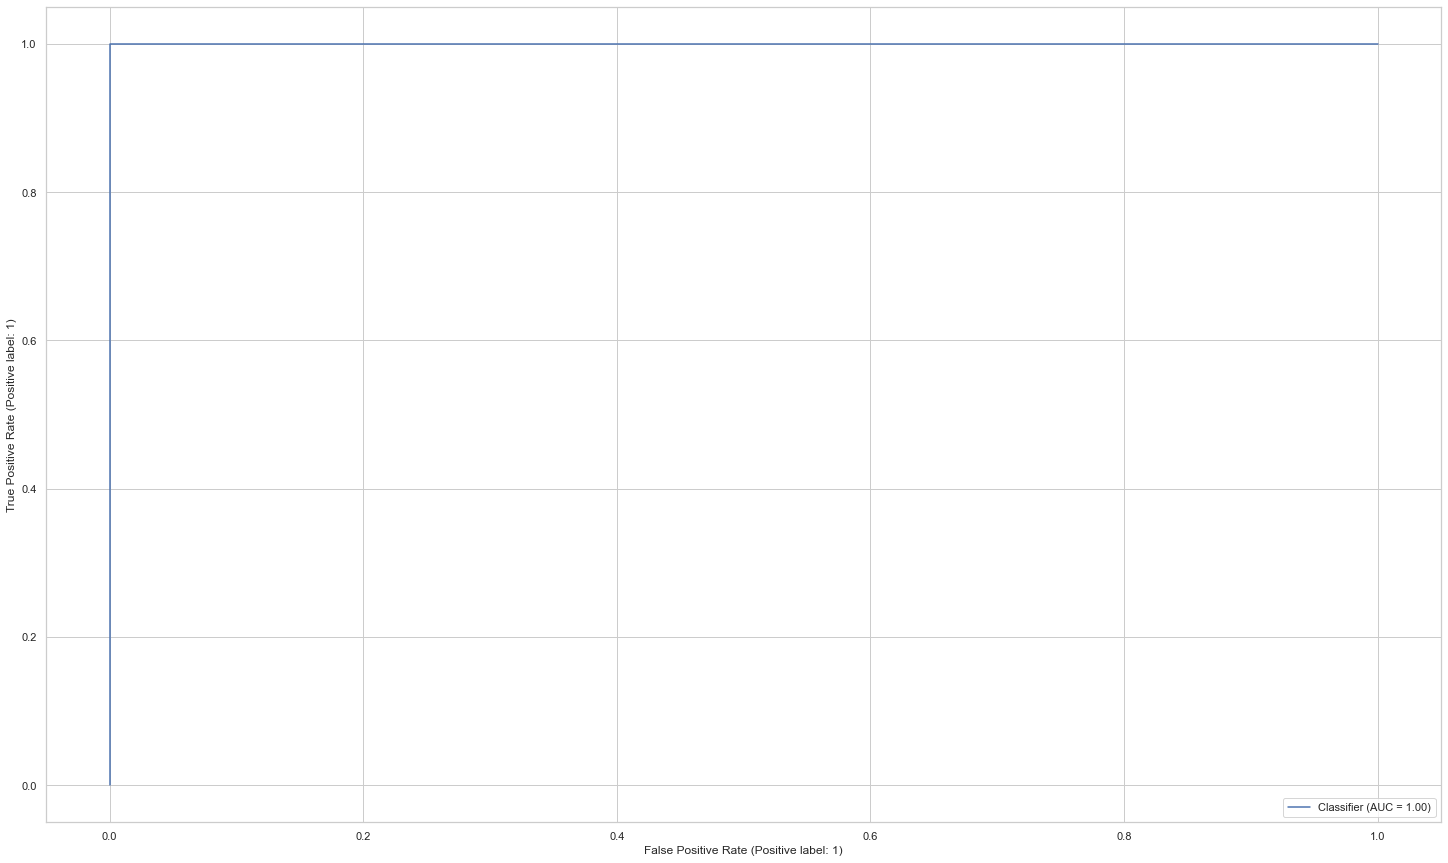

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

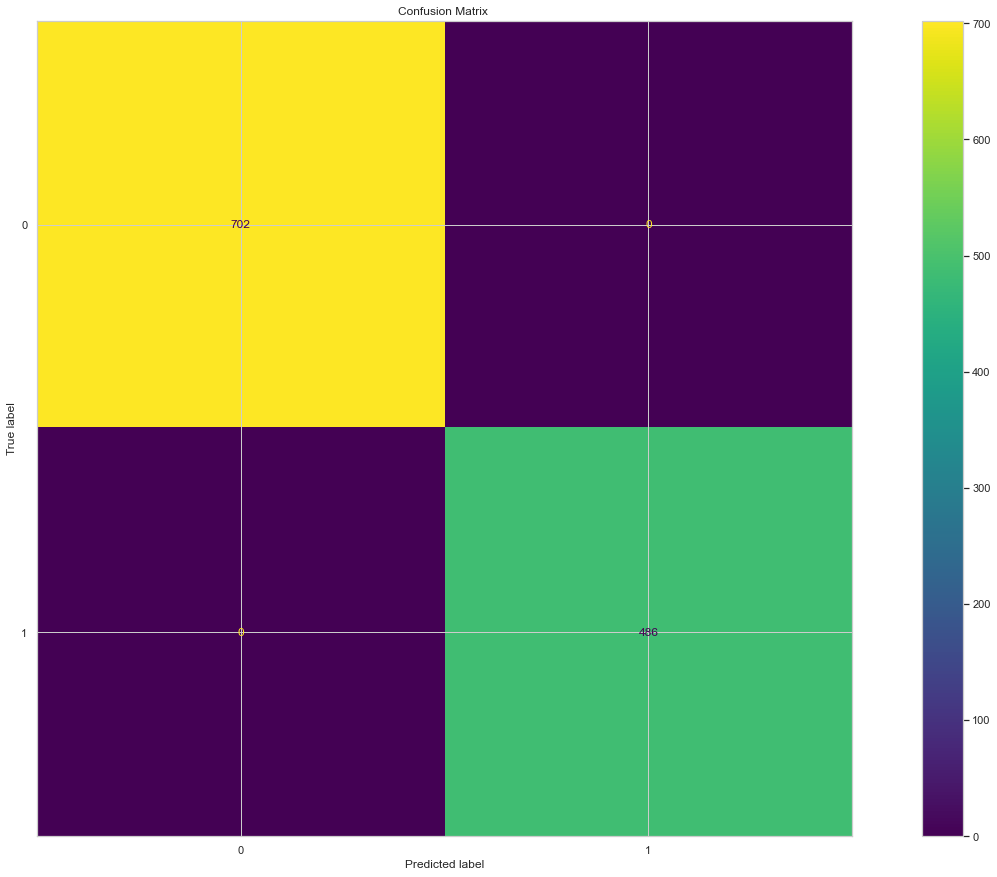

In [138]:
param_grid = {
    'reg__loss': ['hinge','log'],
    'reg__penalty':['l2', 'l1', 'elasticnet'],
    'reg__alpha': [0.0001, 0.001,0.01, 0.1]
}

model=trainmodel(SGDClassifier(),data_prep_pipeline,param_grid,'accuracy')
# if(model.best_params_['reg__loss']=='hinge'):
#     from sklearn.calibration import CalibratedClassifierCV
#     cal=CalibratedClassifierCV(model, cv='prefit')
#     model=trainmodel(cal,data_prep_pipeline,param_grid,'accuracy')
addresultotable(model,"SVD_LOG_b")
plotROC(model)
plotConf(model)
model_SVD_LOG=model
MODELS['SVD_LOG_b']=model_SVD_LOG

In [139]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988
2,RF,1.0000,0.9984,1.0000,0.9990,1.0000,0.9984,0.9992
3,KNN,1.0000,0.9969,1.0000,0.9933,1.0000,0.9969,0.9984
4,XGB_b,0.9941,0.9933,0.9934,0.9927,0.9941,0.9933,0.9941
5,SVD_LOG_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9992


In [140]:
model.best_params_

{'reg__penalty': 'elasticnet', 'reg__loss': 'log', 'reg__alpha': 0.0001}

# RandomForest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 2160x1080 with 0 Axes>

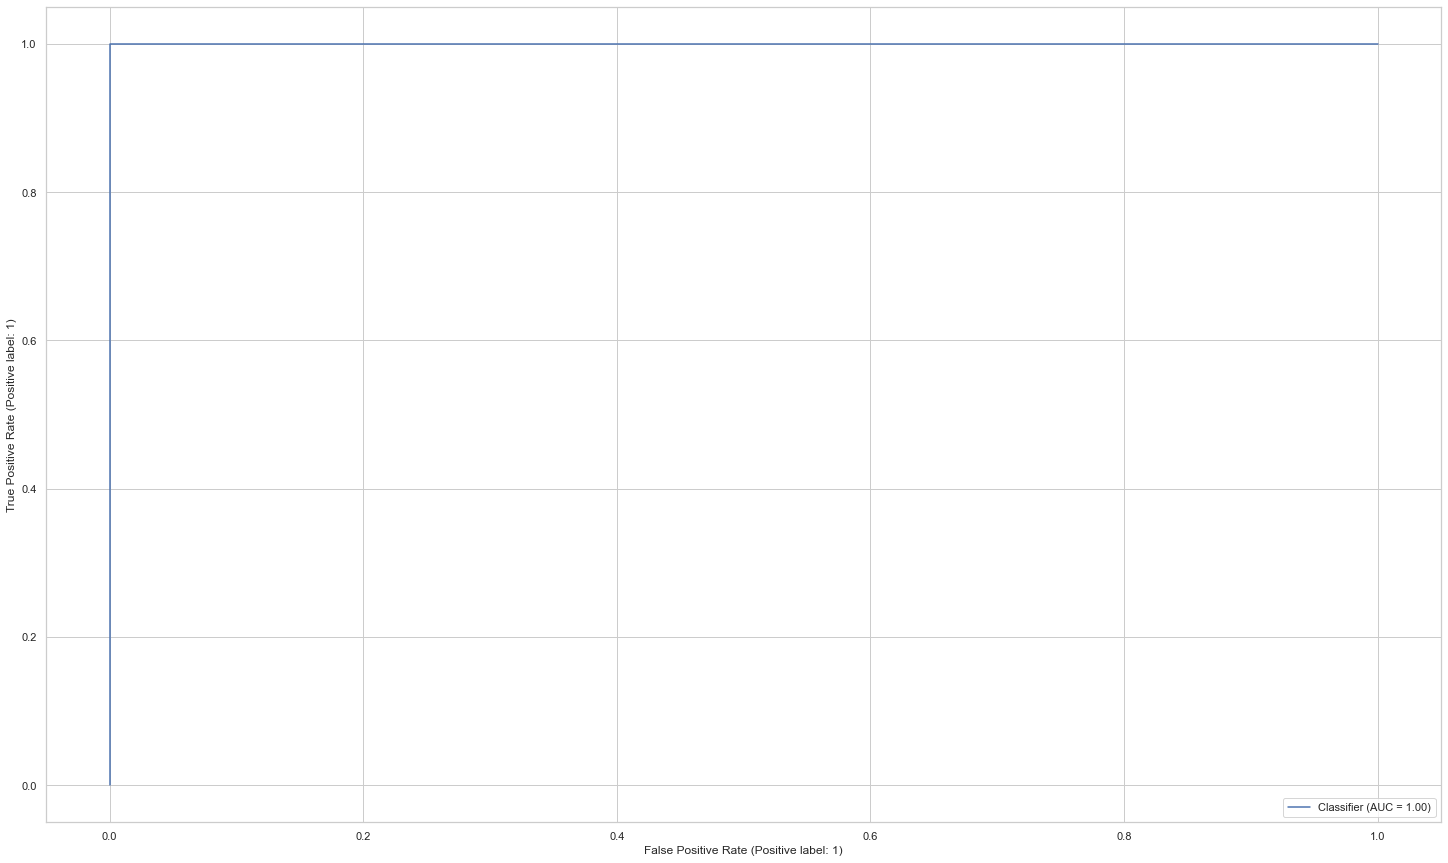

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

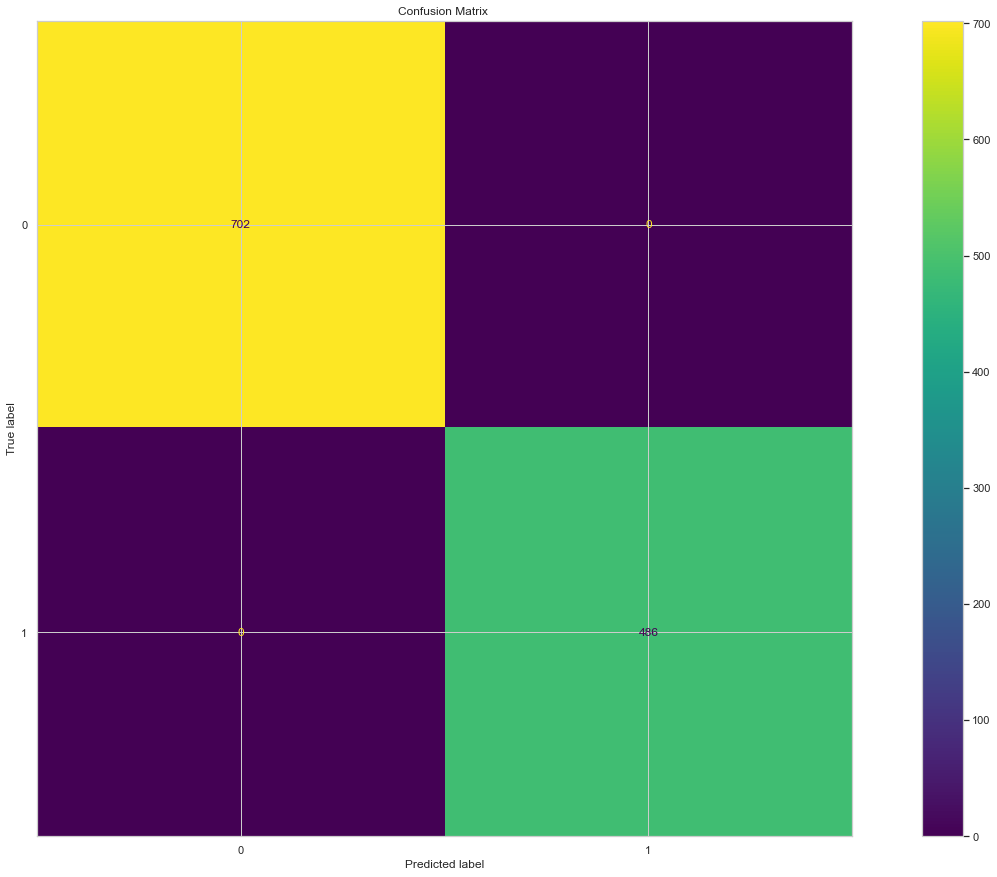

In [141]:
param_grid = {
    'reg__bootstrap': [True],
    'reg__max_depth': [10, 20,50,100],
    'reg__max_features': [2, 5,10,50],
    'reg__n_estimators': [100, 200,500]
}
model=trainmodel(RandomForestClassifier(),data_prep_pipeline,param_grid,'accuracy')
addresultotable(model,"RF_b")
model_RF=model
MODELS['RF_b']=model_RF
plotROC(model)
plotConf(model)

In [142]:
model.best_params_

{'reg__n_estimators': 500,
 'reg__max_features': 10,
 'reg__max_depth': 50,
 'reg__bootstrap': True}

In [143]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988
2,RF,1.0000,0.9984,1.0000,0.9990,1.0000,0.9984,0.9992
3,KNN,1.0000,0.9969,1.0000,0.9933,1.0000,0.9969,0.9984
4,XGB_b,0.9941,0.9933,0.9934,0.9927,0.9941,0.9933,0.9941
5,SVD_LOG_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9992
6,RF_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9992


# KNN

Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 2160x1080 with 0 Axes>

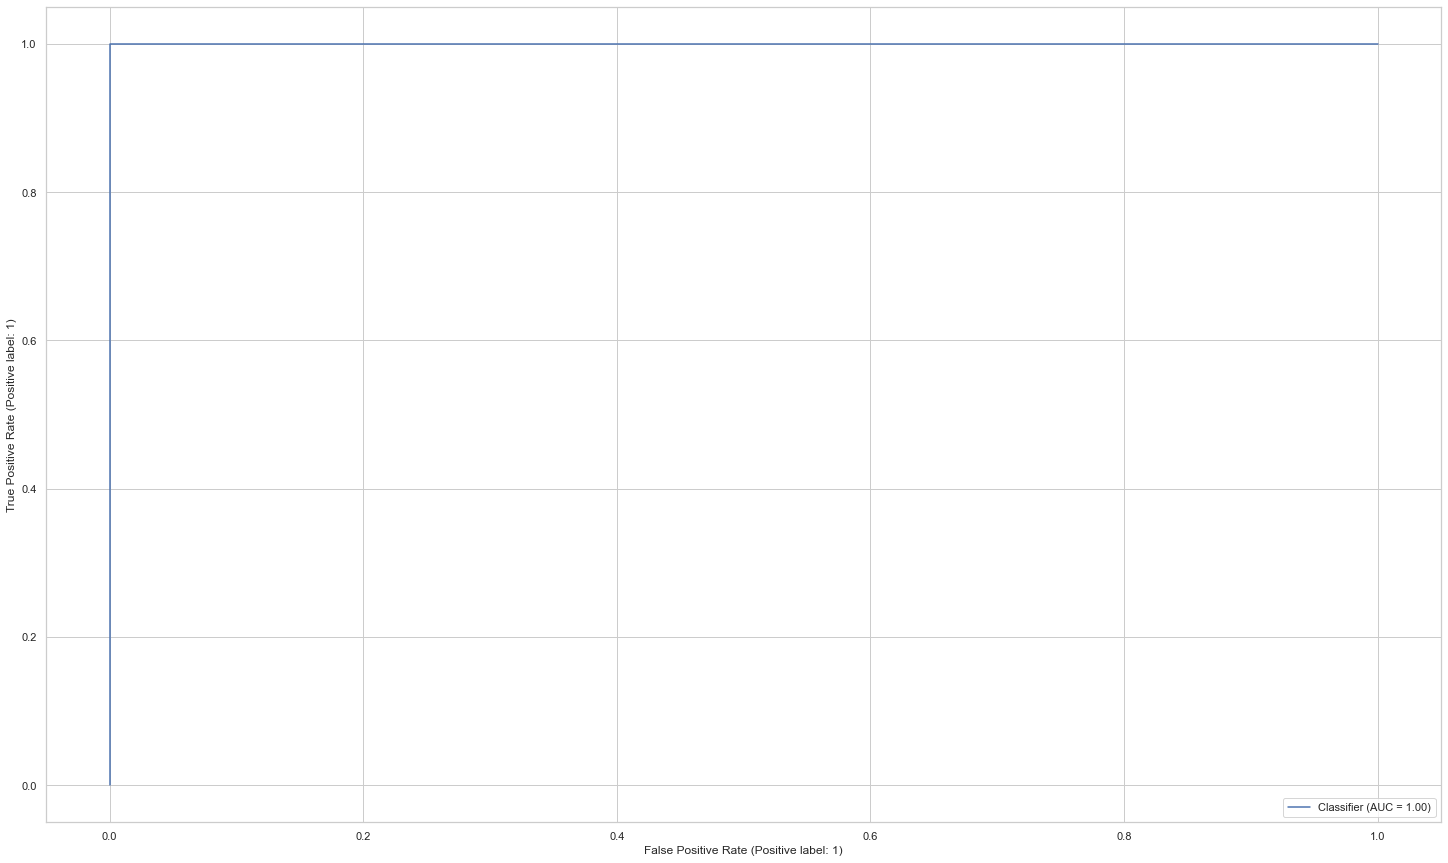

C:\Users\prath\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

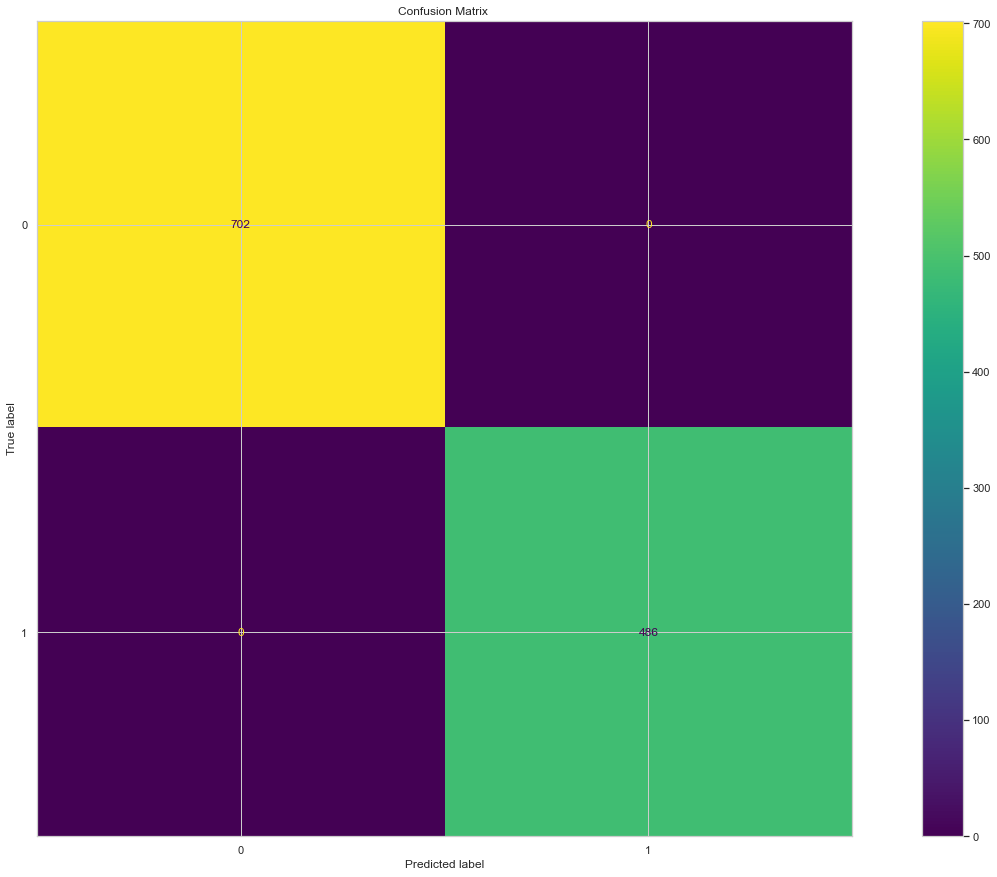

In [144]:
param_grid = {
    'reg__n_neighbors': [2,5,10],
    'reg__weights':['uniform', 'distance'],
    'reg__p': [1,2]
}
model=trainmodel(KNeighborsClassifier(),data_prep_pipeline,param_grid,'accuracy')
addresultotable(model,"KNN_b")
model_Knn=model
MODELS['Knn_b']=model_Knn
plotROC(model)
plotConf(model)

In [145]:
model.best_params_

{'reg__weights': 'distance', 'reg__p': 2, 'reg__n_neighbors': 2}

In [146]:
expLog

,exp_name,Train Acc,Test Acc,Train AUC,Test AUC,Train F1,Test F1,best_score
0,XGB,0.9953,0.9938,0.9917,0.9913,0.9953,0.9938,0.9953
1,SVD_LOG,0.9992,0.9984,0.9995,0.9990,0.9992,0.9984,0.9988
2,RF,1.0000,0.9984,1.0000,0.9990,1.0000,0.9984,0.9992
3,KNN,1.0000,0.9969,1.0000,0.9933,1.0000,0.9969,0.9984
4,XGB_b,0.9941,0.9933,0.9934,0.9927,0.9941,0.9933,0.9941
5,SVD_LOG_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9992
6,RF_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9992
7,KNN_b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9992


In [147]:
model = MODELS['RF_b']
ytest=model.predict(testdata)
submission = pd.DataFrame({

        "ID": testdata["ID"],

        "Target": ytest

    })
submission.to_csv('submission_RF_b.csv', index=False)


model = MODELS['Knn_b']
ytest=model.predict(testdata)
submission = pd.DataFrame({

        "ID": testdata["ID"],

        "Target": ytest

    })
submission.to_csv('submission_Knn_b.csv', index=False)

In [148]:
gc.collect()

7176

In [149]:
#!pip install --upgrade --user nltk

# Conculsion

Conducted 13 experiments and analysis of models.
Models checked: XGBoost, SVD, Random Forest,KNN

Of these Models: Random Forest performed best

In [150]:
#!pip install --upgrade --user nltk

In [151]:
import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import tree2conlltags

In [152]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
df2 = df
df2['tokTw'] = df2['full_text'].apply(word_tokenize).apply(pos_tag).apply(nltk.ne_chunk,args=(False,)).apply(tree2conlltags)

In [153]:
df2['tokTw'][4]

[('21', 'CD', 'O'),
 ('year', 'NN', 'O'),
 ('old', 'JJ', 'O'),
 ('Palestinian', 'NNP', 'B-GPE'),
 ('woman', 'NN', 'O'),
 ('murdered', 'VBN', 'O'),
 ('by', 'IN', 'O'),
 ('her', 'PRP$', 'O'),
 ('brother', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('honor', 'NN', 'O'),
 ('killing', 'VBG', 'O'),
 ('-', ':', 'O'),
 ('anti', 'NN', 'O'),
 ('smite', 'JJ', 'O'),
 ('Rashida', 'NNP', 'B-PERSON'),
 ('Talib', 'NNP', 'I-PERSON'),
 ('blames', 'VBZ', 'O'),
 ('jews', 'NNS', 'O'),
 ('.', '.', 'O'),
 ('DARN', 'NNP', 'B-ORGANIZATION'),
 ('JEWS', 'NNP', 'O'),
 ('GET', 'NNP', 'O'),
 ('AWAY', 'NNP', 'O'),
 ('WITH', 'NNP', 'O'),
 ('EVERYTHING', 'NNP', 'O'),
 ('.', '.', 'O'),
 ('ARNT', 'NNP', 'B-ORGANIZATION'),
 ('WE', 'NNP', 'O'),
 ('LUCKY', 'NNP', 'O'),
 ('TO', 'NNP', 'O'),
 ('HAVE', 'NNP', 'O'),
 ('THIS', 'NNP', 'O'),
 ('TOOL', 'NNP', 'O'),
 ('IN', 'NNP', 'O'),
 ('CONGRESS', 'NNP', 'O'),
 ('?', '.', 'O'),
 ('?', '.', 'O'),
 ('?', '.', 'O'),
 ('Paint', 'NNP', 'O'),
 ('my', 'PRP$', 'O'),
 ('country', 'NN', 'O'),
 ('re

In [154]:
def gpeex(td):
    fl=[]
    for tp in td:
        if(tp[2]=='B-GPE' or tp[2]=='I-GPE'):
            fl.append(tp[0].lower())
    return tuple(fl)

In [155]:
df2['GPEs']=df2['tokTw'].apply(gpeex)

In [156]:
df2['GPEs']

0                   ()
1                   ()
2          (american,)
3                   ()
4       (palestinian,)
             ...      
3211                ()
3212                ()
3213      (u.s., life)
3214         (israel,)
3215        (british,)
Name: GPEs, Length: 3216, dtype: object

In [157]:
plt.figure(figsize=(5,5))
datasets["application_train"]['GPEs'].plot.hist(label=True);
plt.title('TARGET Distribution')
plt.xlabel('TARGET value')
plt.ylabel('Frequency');
plt.show()

NameError: name 'datasets' is not defined

<Figure size 360x360 with 0 Axes>

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
#https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c
def stack_plot(data, xtick, col2='Target', col3='total'):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values,color=['Black'])
    p2 = plt.bar(ind, data[col2].values,color=['Red'])
    plt.ylabel('Loans')
    plt.title('Loans Approved vs Rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('CAPABLE', 'INCAPABLE'))
    plt.show()
    
    
def univariate_barplots(data, col1, col2='Target', top=False):
    
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']  
    temp.sort_values(by=['total'],inplace=True, ascending=False)  
    if top:
        temp = temp[0:top]  
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

def stack_plot_dist(data, xtick, col2='Target', col3='total'):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values,color=['Black'])
    p2 = plt.bar(ind, data[col2].values,color=['Red'])
    plt.ylabel('Loans')
    plt.title('Loans Approved vs Rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('CAPABLE', 'INCAPABLE'))
    plt.show()

In [ ]:
univariate_barplots(df2, 'GPEs', col2='Target', top=False)